### espace pour charger les librairies nécessaires

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from pandas import DataFrame

## Simulation de la regression linéaire sans et avec bruits

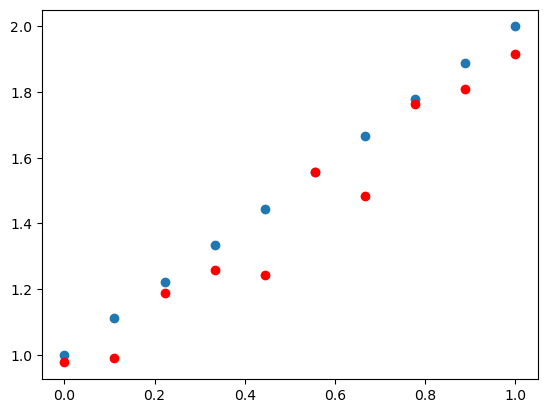

In [41]:
x=np.linspace(0,1,10)
beta=[1,1]


t=beta[0] + beta[1]*x
tnoisy=t+np.random.normal(0,0.1,len(x))

plt.scatter(x,t)
plt.scatter(x,tnoisy,c="r")
plt.show()


# Descente du gradient

#### fonction pour calculer le cout et celle pour évaluer la valeur d'un nouveau point

In [42]:

def helper(x,beta):
    result=beta[0]
    for i in range(len(x)):
        result+=beta[i+1]*x[i]
    return result
    

def cout(X,t,beta):
    X=np.array(X)
    lost=0
    for i in range(X.shape[0]):
        lost +=(t[i]-helper(X[i],beta))**2
    return lost/X.shape[0]


#### fonction pour faire la descente du gradient

In [43]:
def gradient(x:list,t,beta0):
    T=list(x)
    T.insert(0,1.0)
    inter=(t-helper(x,beta0))*(-2.0)
    result=[]
    for i in range(len(T)):
        result.append(T[i]*inter)
    return result

#### fonction pour calculer la norme d'un vecteur

In [44]:
def norme(grad):
    result=0
    for i in range(len(grad)):
        result+=grad[i]**2
    return sqrt(result)

#### fonction pour mettre à jour les coéfficients du modèle de regression linéaire

In [45]:
def update(grad,l,beta):
    betaP=[]
    for i in range(len(grad)):
        b=beta[i]-l*grad[i]
        betaP.append(b)
    return betaP

#### fonction pour faire l'apprentissage et les prédictions

In [46]:
def fit(X,t,learning_rate=0.001,iter_max=50):
    
    beta=np.linspace(0,0,np.array(X).shape[1]+1)

    grad=gradient(X[0],t[0],beta)
    norm=norme(grad)
    k=0
    while( norm>0.000001 or k<iter_max):
        for i in range(1,np.array(X).shape[0]):
            print( cout(X,t,beta))
            beta=update(grad,learning_rate,beta)
            grad=gradient(X[i],t[i],beta)
            norm=norme(grad)
        k+=1
    return beta

def predit(X,beta):
    predictions=[]
    for i in range(len(X)):
        predictions.append(helper(X[i],beta))
    return predictions


## Test des fonctions d'apprentissage et de prédiction

13.444444444444443
4.0396037189452825
1.2137651558268507
0.3646956374928858
0.10957878249168948
0.03292474144990336
0.009892778281463482
0.002972447400235626
0.0008931205467045341
0.0002683527085736095
8.063097021394023e-05
2.4226896729307964e-05
7.279368257320591e-06
2.1872055186332858e-06
6.571817514417321e-07
1.974610299527812e-07
5.9330403293465896e-08
1.7826792232230985e-08
5.356351948641233e-09
1.6094037459432968e-09
4.835717373504879e-10
1.45297055347815e-10
4.3656882034822214e-11
1.3117425843055256e-11
3.941345619813081e-12
1.184241899801518e-12
3.5582489170501e-13
1.0691342135704966e-13
3.2123889950131514e-14
9.652149335410734e-15
2.9001465002655387e-15
8.713965384559451e-16
2.6182536769461554e-16
7.866972043913166e-17
2.3637607340923598e-17
7.102309020372052e-18
2.134003890230642e-18
6.411972192476854e-19
1.9265818346654807e-19
5.78870703165671e-20
1.7393112238522492e-20
5.2259976487663664e-21
1.5702614268408189e-21
4.718145014819683e-22
1.4176416610195684e-22
4.2587252544415

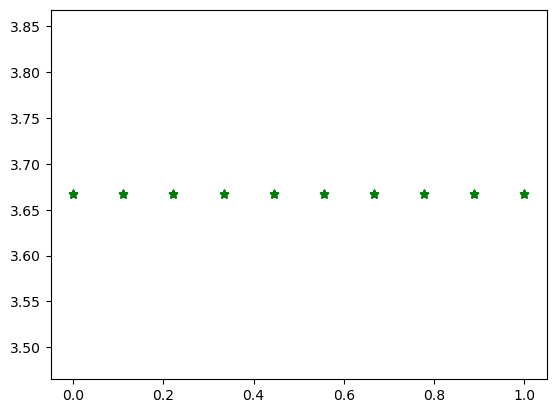

In [47]:
X=[np.linspace(0,1,10) for _ in range(5)]
beta0=np.linspace(0,1,11)
t=[]
for i in range(np.array(X).shape[0]):
    t.append(helper(X[i],beta0))
beta=fit(X,t,0.05,200)

X_test=[np.linspace(0,1,10) for _ in range(10)]
# print(f"beta0={beta0}")
# print(f"beta={beta}")
predictions=predit(X,beta)

df=DataFrame(X,columns=[f"col_{_}" for _ in range(np.array(X).shape[1])])
for _ in range(np.array(X).shape[1]):
    plt.scatter(df[f"col_{_}"],t,marker=".",c='b')
    plt.scatter(df[f"col_{_}"],predictions,marker="*",c='g')
plt.show()
